In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'glovetwitter27b100dtxt:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F16021%2F21146%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240524%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240524T144628Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D64395108813b380f247c8775e9d352a17522ba9bea5ce8e87ff2f590b45ef741258b7def28daa983df3254c396974f45da96fba83f380ea020f6004bc5d54d4c92dc77406c8de9655c7fdd420dba4f9f7c39596565620ae78717a15bdc79ea48fe44b6cd8266b9effdc1d36af88d12a1bcab3d50b077daffce27c92d3d15eae52eda0e6fa751bd7aaab0d73e572f625efebfa5966d867aa55dca4b349b6e6c9f070d8df2be66e5695d54551262e5408fe888da63c884d3b31b55c3b40e9f4cce69ad9ed7c7db906b33dc6db9eb67e8521c8ba66ad59521835a96dbcd0a24d29eea3a62d280eb7215f4a0b613cfa4b9c1f03d4bb7cbd4be52f977ecd329530733,indo-spam-thingy:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5067998%2F8493939%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240524%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240524T144629Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D463c43a1c189ca90d9c053ef53a8bfc893236ac61290d6b21358952223cbe4a1efe2c888b0e894d8910fb69b281525fd6bc27d08765b8479b7851b5ef39fd456fa9b087914c485cd5cba79f9ab667fc45ef14f6ce326a16770af74449b33d4ffc33618556e9e69bc473abf9a659b73ce29c06456151aa51037d5b2981852ad48eb04162404607c1972911a2da5edbc1274173bbea18061e32072be4edc0058e5aa7674d3620eeee47226599baf23b892ec710a0506e550a56bdc0a2c3f5cef6e616dd2c54ed1ffe73bd76a389b5a804700b449ecd128cb8e9b525cfb6ae48e998e964fb151735289303ee5e3972214045c5893f34b159e9918fd5f115b670a92'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indo-spam-thingy/df_preprocess.csv
/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.100d.txt


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from tensorflow.keras.preprocessing import text, sequence
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read Data

In [ ]:
DATA_SET = pd.read_csv("/kaggle/input/indo-spam-thingy/df_preprocess.csv")
DATA_SET.head()

,label,no_url
0,2,promo beli paket flash mulai 1gb telkomsel app...
1,2,2 5 gb 30 hari hanya rupiah 35 ribu spesial bu...
2,2,2016 07 08 11 47 11 pulang terhormat sisa kuot...
3,2,2016 08 07 11 29 47 pulang terhormat sisa kuot...
4,2,4 5gb 30 hari hanya rupiah 55 ribu spesial bua...


# Show data info

In [ ]:
DATA_SET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1143 non-null   int64 
 1   no_url  1143 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


# Ploting

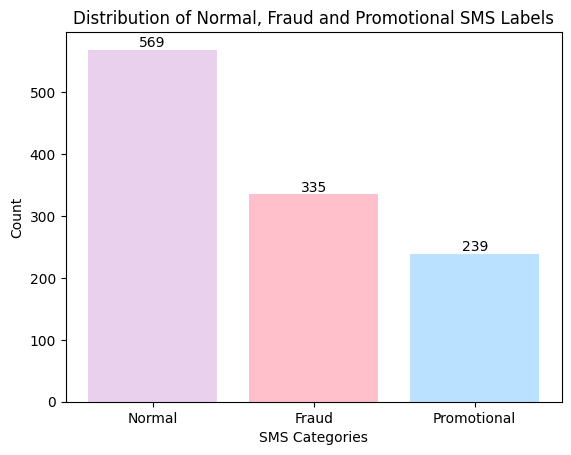

In [ ]:
# Assuming the label counts are stored in the 'label_counts' variable
label_counts = DATA_SET['label'].value_counts()

# Mapping numerical labels to their corresponding text labels
label_mapping = {0: 'Normal', 1: 'Fraud', 2: 'Promotional'}
label_names = [label_mapping[label] for label in label_counts.index]

# Define RGB colors (normalized to the range [0, 1])
color_directory = {
    'Normal': (233/255, 209/255, 238/255),       # Light pink 	233	209	238
    'Fraud': (255/255, 192/255, 203/255),        # Pink
    'Promotional': (186/255, 225/255, 255/255)   # Light blue
}
colors = [color_directory[label] for label in label_names]

# Creating a bar graph
plt.bar(label_names, label_counts, color=colors)
plt.xlabel('SMS Categories')
plt.ylabel('Count')
plt.title('Distribution of Normal, Fraud and Promotional SMS Labels')

# Display the count on top of each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
DATA_SET.isna().sum() # Checking for nan Values


label     0
no_url    0
dtype: int64

# Evaluate data Distribution

In [ ]:
DATA_SET.label.value_counts()

label
0    569
1    335
2    239
Name: count, dtype: int64

In [ ]:
df = DATA_SET.copy()

In [ ]:
stop = set(stopwords.words('indonesian'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# CLEANING DATA

# **Deep Learning**

## Splitting the data into 2 parts - training and testing data

In [ ]:
from tensorflow.keras.preprocessing import text, sequence
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have defined df already
x_train, x_test, y_train, y_test = train_test_split(df['no_url'], df['label'], random_state=0)

# Maximum number of words to keep, based on word frequency
max_features = 3851
# Maximum length of text sequences
maxlen = 300

# Tokenize text
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)

# Tokenize and pad sequences for train set
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

# Tokenize and pad sequences for test set
tokenized_test = tokenizer.texts_to_sequences(x_test)
x_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

# Print the shapes and first sample of x_train and x_test
print(f"x_train shape: {x_train.shape}")
print(f"x_train[0]: {x_train[0]}")
print(f"x_test shape: {x_test.shape}")
print(f"x_test[0]: {x_test[0]}")


x_train shape: (857, 300)
x_train[0]: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    

Tokenizing Headline -> Repsesenting each word by a number

Mapping of orginal word to number is preserved in word_index property of tokenizer

Tokenized applies basic processing like changing it to lower case, explicitely setting that as False

Lets keep all news to 300, add padding to news with less than 300 words and truncating long ones

# Naive Bayes



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x=df['no_url']
y=df['label']
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=32)

In [ ]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming `x` is your text data and `y` are the labels
# x = [...]  # Your text data
# y = [...]  # Your labels

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

# Use TfidfVectorizer to transform text data to numerical data

# Initialize the Complement Naive Bayes model
CNB = ComplementNB()

# Fit the model
CNB.fit(x_train_tfidf, y_train)

# Predict the labels for the test set
predicted = CNB.predict(x_test_tfidf)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted)
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy * 100)) + '%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted, target_names=['normal', 'fraud', 'promo']))


ComplementNB model accuracy is 91.27%
------------------------------------------------
Confusion Matrix:
     0   1   2
0  104   2   3
1    5  52   6
2    1   3  53
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

      normal       0.95      0.95      0.95       109
       fraud       0.91      0.83      0.87        63
       promo       0.85      0.93      0.89        57

    accuracy                           0.91       229
   macro avg       0.90      0.90      0.90       229
weighted avg       0.91      0.91      0.91       229



In [ ]:
batch_size = 256
epochs = 32
embed_size = 100

# LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, TimeDistributed
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'no_url' (text data) and 'label' (labels)
# df = pd.read_csv('your_dataset.csv')

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['no_url'], y, test_size=0.20, random_state=32)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting the number of features
x_train_tfidf = vectorizer.fit_transform(x_train).toarray()
x_test_tfidf = vectorizer.transform(x_test).toarray()

# Reshape data to fit LSTM input requirements (samples, timesteps, features)
# In this case, we treat each document as a sequence with a single timestep
x_train_tfidf = np.expand_dims(x_train_tfidf, axis=1)
x_test_tfidf = np.expand_dims(x_test_tfidf, axis=1)

# Parameters
batch_size = 64
epochs = 32
input_dim = x_train_tfidf.shape[2]  # Number of features

print(input_dim)

# Callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Initialize the model
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, input_dim), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))  # Change units to 3 for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


3851


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 1, 64)          │     1,002,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,015,011 (3.87 MB)

 Trainable params: 1,015,011 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(input_dim)

3851


Epoch 1/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4901 - loss: 1.0960 - val_accuracy: 0.4153 - val_loss: 1.0917 - learning_rate: 0.0010
Epoch 2/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5313 - loss: 1.0833 - val_accuracy: 0.4153 - val_loss: 1.0823 - learning_rate: 0.0010
Epoch 3/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5260 - loss: 1.0653 - val_accuracy: 0.4153 - val_loss: 1.0674 - learning_rate: 0.0010
Epoch 4/32
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5312 - loss: 1.0432
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5463 - loss: 1.0343 - val_accuracy: 0.4153 - val_loss: 1.0434 - learning_rate: 0.0010
Epoch 5/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5252 - loss: 1.0027 - val_accuracy: 0.4153 - val_loss: 1.0261 - learning_rate: 5.0000e-04
Epoch 6/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5361 - loss: 0.9718 - val_accur

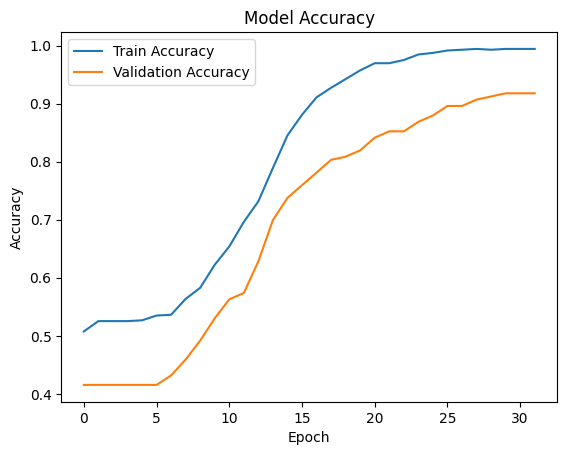

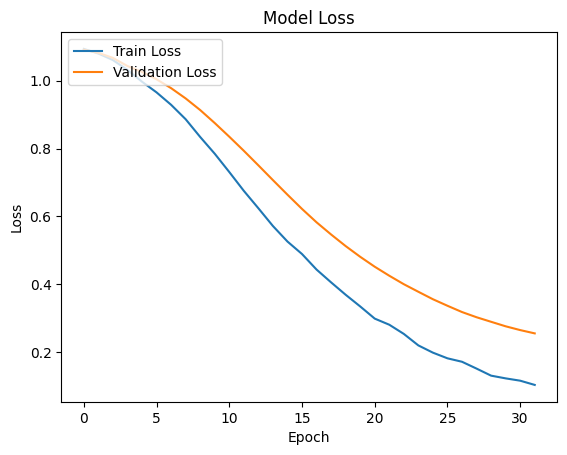

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9088 - loss: 0.2832 
Test accuracy: 0.9126637578010559


In [ ]:
history = model.fit(x_train_tfidf, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[learning_rate_reduction, early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Evaluate the model
score = model.evaluate(x_test_tfidf, y_test, batch_size=batch_size)
print(f'Test accuracy: {score[1]}')